In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
def read_log(path):
    rows = []
    for line in open(path).readlines():
        rows.append(json.loads(line.strip()))
    return pd.DataFrame(rows)
        

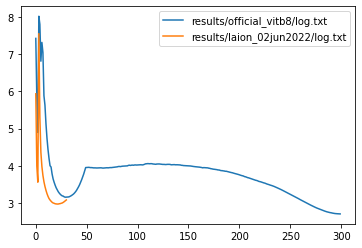

In [7]:
paths = [
    #"results/imagenet1k_24apr2022/log.txt",
    #"results/imagenet1k_25apr2022/log.txt",
    #    "results/imagenet1k_26apr2022/log.txt",
    #    "results/imagenet1k_27apr2022/log.txt",
    #"results/imagenet1k_28apr2022/log.txt",
    #"results/imagenet21k_29apr2022/log.txt",
    "results/official_vitb8/log.txt",
    #"results/official_vits16/log.txt"
    #"results/laion_13apr2022/log.txt"
    #"results/imagenet1k_07nov2021/log.txt",
    #"results/official_vitb16/log.txt",
    "results/laion_02jun2022/log.txt",
]
for path in paths:
    df= read_log(path)
    plt.plot(df.epoch, df.train_loss, label=path)
plt.legend()

In [4]:
%%time
from glob import glob
import torch
import os
rows = []
#for model in glob("results/imagenet1k_29apr2022/checkpoint.pth"):
for model in glob("results/**/checkpoint.pth"):
    try:
        ckpt = torch.load(model, map_location="cpu")
    except Exception:
        continue
    row = {}
    row["path"] = model

    if "args" in ckpt:
        args = ckpt["args"]
        row["arch"] = args.arch + "_" + str(args.patch_size)
        
    for evaluation in glob(os.path.join(os.path.dirname(model), "eval*", "log.txt")):
        ev = read_log(evaluation)
        final = ev.iloc[-1].to_dict()
        ds = os.path.basename(os.path.dirname(evaluation))
        for k, v in final.items():
            if "acc" in k:
                row[ds+"_"+k] = v
        
    rows.append(row)
df = pd.DataFrame(rows)
df.sort_values(by="eval_linear_imagenet1k_test_acc1", ascending=False)

CPU times: user 7.41 s, sys: 39.9 s, total: 47.3 s
Wall time: 3min 6s


,path,arch,eval_linear_cifar10_test_acc1,eval_linear_cifar10_test_acc5,eval_linear_imagenet1k_test_acc1,eval_linear_imagenet1k_test_acc5,eval_fast_linear_cifar10_fs10_accuracy,eval_fast_linear_cifar10_fs10_mean_accuracy,eval_fast_linear_cifar10_fs10_std_accuracy,eval_linear_imagenet1k_wds_test_acc1,...,eval_fast_linear_imagenet1k_fs10_mean_accuracy,eval_fast_linear_imagenet1k_fs10_std_accuracy,eval_linear_imagenet1k_lr0.0005_test_acc1,eval_linear_imagenet1k_lr0.0005_test_acc5,eval_linear_imagenet1k_lr0.005_test_acc1,eval_linear_imagenet1k_lr0.005_test_acc5,eval_linear_cifar10_bn_test_acc1,eval_linear_cifar10_bn_test_acc5,eval_linear_imagenet1k_bn_test_acc1,eval_linear_imagenet1k_bn_test_acc5
20,results/official_vitb8/checkpoint.pth,NaN,96.67,99.97,79.824,94.840,"[0.8668, 0.901, 0.887, 0.9024, 0.8872]",0.88888,0.012834,NaN,...,0.663068,0.002248,79.520,94.698,NaN,NaN,NaN,NaN,NaN,NaN
31,results/imagenet1k_18feb2022/checkpoint.pth,vit_base_8,96.48,99.97,78.986,94.408,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,results/imagenet21k_19feb2022/checkpoint.pth,vit_base_8,98.06,99.98,78.702,94.634,[0.9443],0.94430,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,results/imagenet1k_17jan2022/checkpoint.pth,vit_large_16,97.29,99.98,78.426,93.892,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,results/official_vitb16/checkpoint.pth,NaN,96.28,99.94,77.842,93.708,NaN,NaN,NaN,77.868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,results/imagenet1k_07nov2021/checkpoint.pth,vit_base_16,96.36,99.99,77.184,93.334,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,results/official_vits16/checkpoint.pth,NaN,94.46,99.94,76.878,92.998,[0.7966],0.79660,0.000000,NaN,...,NaN,NaN,76.768,92.884,76.354,92.604,NaN,NaN,NaN,NaN
22,results/imagenet1k_25apr2022/checkpoint.pth,vit_small_16,91.62,99.78,74.502,91.506,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,results/imagenet1k_28apr2022/checkpoint.pth,vit_small_16,91.80,99.86,74.196,91.578,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,results/imagenet1k_24apr2022/checkpoint.pth,vit_small_16,91.88,99.75,73.784,91.362,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
